### 1. First Steps

Libraries we need for the data collect

In [209]:
import requests
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")

Download the dataset from kaggle using API

In [210]:
import os
os.environ['KAGGLE_USERNAME'] = 'illomen'
os.environ['KAGGLE_KEY'] = "2e1f476e8f61e2577fd301487e2724bd"

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

# Tghis will save the download content in the path location
api.dataset_download_files('rounakbanik/pokemon', path="../data/")

In [211]:
# It downloaded a zip so we unzip it
file_location = "../data/pokemon.zip"
with zipfile.ZipFile(file_location, 'r') as zip_ref: #MAYBE YOU WILL NEED TO CNAHGE THE LOCATIONS LATER
    zip_ref.extractall(path="../data/")


Congratulations now you have the csv, let's load it and see how it looks

In [212]:
full_pokemon = pd.read_csv('../data/pokemon.csv')
full_pokemon

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


It helps having the columns displayed to work with the dataset to me

In [213]:
# To see the columns the columns name
full_pokemon.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [214]:
# I just want to have the pokemons from gen 1 to 6, never played the other games so I don't care about they
df = full_pokemon[full_pokemon['generation'] <= 6]

### 2. Now that we have the dataframe we are going to set it up

In [215]:
pokemon = pd.DataFrame({'Number': df['pokedex_number'], 
                        'Name': df['name'],
                        'Classification': df['classfication'],
                        'Type 1': df['type1'].str.capitalize(),
                        'Type 2': df['type2'].str.capitalize(),
                        'HP': df['hp'],
                        'Attack': df['attack'],
                        'Defense': df['defense'],
                        'Sp. Atk': df['sp_attack'],
                        'Sp. Def': df['sp_defense'],
                        'Speed': df['speed'],
                        'Total': df['base_total'],
                        'Generation': df['generation'],
                        'Legendary': df['is_legendary'].astype(bool)})

pokemon['Type 2'] = pokemon['Type 2'].fillna('0')#Change nan for something like 0
pokemon.set_index('Number') # We set the pokemon pokedex number as the index

,Name,Classification,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,Generation,Legendary
Number,,,,,,,,,,,,,
1,Bulbasaur,Seed Pokémon,Grass,Poison,45,49,49,65,65,45,318,1,False
2,Ivysaur,Seed Pokémon,Grass,Poison,60,62,63,80,80,60,405,1,False
3,Venusaur,Seed Pokémon,Grass,Poison,80,100,123,122,120,80,625,1,False
4,Charmander,Lizard Pokémon,Fire,0,39,52,43,60,50,65,309,1,False
5,Charmeleon,Flame Pokémon,Fire,0,58,64,58,80,65,80,405,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,Yveltal,Destruction Pokémon,Dark,Flying,126,131,95,131,98,99,680,6,True
718,Zygarde,Order Pokémon,Dragon,Ground,216,100,121,91,95,85,708,6,True
719,Diancie,Jewel Pokémon,Rock,Fairy,50,160,110,160,110,110,700,6,True


Export the modified dataframe

In [216]:
pokemon.to_csv('pokemon_modified.csv', index=False) #MOVE THE NEW CSV TO THE data FOLDER


### 3. Now the data visualization

In [218]:
#All possible types
types = pd.concat([pokemon['Type 1'], pokemon['Type 2']]).unique()


Data statistics

In [237]:
pokemon.describe()

,Number,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,Generation
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,361.00000,68.779473,77.105409,72.453537,70.868239,70.385576,66.589459,426.181692,3.323162
std,208.27906,26.394074,32.083095,30.836457,32.165339,27.724759,28.926883,119.431705,1.669873
min,1.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,180.000000,1.000000
25%,181.00000,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000,320.000000,2.000000
50%,361.00000,65.000000,75.000000,68.000000,65.000000,65.000000,65.000000,430.000000,3.000000
75%,541.00000,80.000000,98.000000,90.000000,90.000000,86.000000,88.000000,505.000000,5.000000
max,721.00000,255.000000,185.000000,230.000000,194.000000,230.000000,180.000000,780.000000,6.000000


How many pokemons of each type?

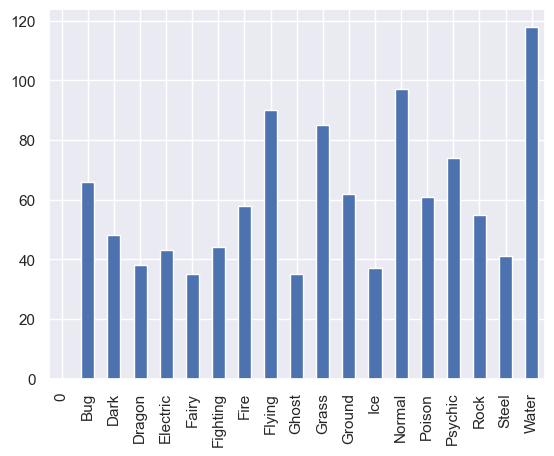

In [229]:
types_count = pokemon['Type 1'].value_counts() + pokemon['Type 2'].value_counts()
types_count = types_count.plot(kind='bar')

Strongest pokemon (Most sum of all attributes)

In [230]:
pokemon[pokemon['Total'] == pokemon['Total'].max()]

,Number,Name,Classification,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,Generation,Legendary
149,150,Mewtwo,Genetic Pokémon,Psychic,0,106,150,70,194,120,140,780,1,True
383,384,Rayquaza,Sky High Pokémon,Dragon,Flying,105,180,100,180,100,115,780,3,True


Strongest non legendary pokemon

In [231]:
non_legend = pokemon[pokemon['Legendary'] == False]
non_legend[non_legend['Total'] == non_legend['Total'].max()]

,Number,Name,Classification,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,Generation,Legendary
247,248,Tyranitar,Armor Pokémon,Rock,Dark,100,164,150,95,120,71,700,2,False
372,373,Salamence,Dragon Pokémon,Dragon,Flying,95,145,130,120,90,120,700,3,False
375,376,Metagross,Iron Leg Pokémon,Steel,Psychic,80,145,150,105,110,110,700,3,False
444,445,Garchomp,Mach Pokémon,Dragon,Ground,108,170,115,120,95,92,700,4,False


Weakest pokemon (Less sum of all attributes)

In [232]:
pokemon[pokemon['Total'] == pokemon['Total'].min()]

,Number,Name,Classification,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,Generation,Legendary
190,191,Sunkern,Seed Pokémon,Grass,0,30,30,30,30,30,30,180,2,False


Weakest legendary pokemon

In [238]:
legend = pokemon[pokemon['Legendary'] == True]
legend[legend['Total'] == legend['Total'].min()]

,Number,Name,Classification,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,Generation,Legendary
143,144,Articuno,Freeze Pokémon,Ice,Flying,90,85,100,95,125,85,580,1,True
144,145,Zapdos,Electric Pokémon,Electric,Flying,90,90,85,125,90,100,580,1,True
145,146,Moltres,Flame Pokémon,Fire,Flying,90,100,90,125,85,90,580,1,True
242,243,Raikou,Thunder Pokémon,Electric,0,90,85,75,115,100,115,580,2,True
243,244,Entei,Volcano Pokémon,Fire,0,115,115,85,90,75,100,580,2,True
244,245,Suicune,Aurora Pokémon,Water,0,100,75,115,90,115,85,580,2,True
376,377,Regirock,Rock Peak Pokémon,Rock,0,80,100,200,50,100,50,580,3,True
377,378,Regice,Iceberg Pokémon,Ice,0,80,50,100,100,200,50,580,3,True
378,379,Registeel,Iron Pokémon,Steel,0,80,75,150,75,150,50,580,3,True
479,480,Uxie,Knowledge Pokémon,Psychic,0,75,75,130,75,130,95,580,4,True


In [242]:
sns.pairplot(data=pokemon.iloc[:,5:11], 
             kind='reg',
             hue= pokemon['Generation'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().